Decision Tree with Information gain as attribute

Classification is a two-step process, learning step and prediction step, in machine learning. In the learning step, the model is developed based on given training data. In the prediction step, the model is used to predict the response for given data. Decision Tree is one of the easiest and popular classification algorithms to understand and interpret.

Decision Tree algorithm belongs to the family of supervised learning algorithms. Unlike other supervised learning algorithms, the decision tree algorithm can be used for solving regression and classification problems too.<br>

The goal of using a Decision Tree is to create a training model that can use to predict the class or value of the target variable by learning simple decision rules inferred from prior data(training data).<br>

In Decision Trees, for predicting a class label for a record we start from the root of the tree. We compare the values of the root attribute with the record’s attribute. On the basis of comparison, we follow the branch corresponding to that value and jump to the next node.<br>

Information gain Attribute : <br>
Information gain or IG is a statistical property that measures how well a given attribute separates the training examples according to their target classification. Constructing a decision tree is all about finding an attribute that returns the highest information gain and the smallest entropy.

Information gain is a decrease in entropy. It computes the difference between entropy before split and average entropy after split of the dataset based on given attribute values. ID3 (Iterative Dichotomiser) decision tree algorithm uses information gain.

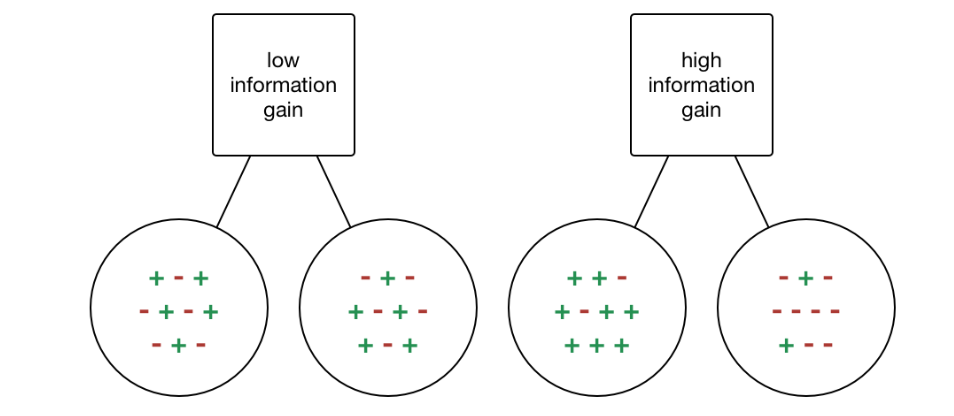

reference: https://machinelearningmastery.com/information-gain-and-mutual-information/

In [1]:
import numpy as np
import pandas as pd
df=pd.read_csv('blood-test.csv')
df.head()


,Unnamed: 0,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation
0,659,2,12,3000,52
1,276,21,7,1750,38
2,263,4,1,250,4
3,303,11,11,2750,38
4,83,4,12,3000,34


In [2]:
# importing libraries  
import numpy as nm  
import matplotlib.pyplot as mtp  
import pandas as pd  
  
#Extracting Independent and dependent Variable  
x= df.iloc[:, [2,3]].values  
y= df.iloc[:, 4].values  
  
# Splitting the dataset into training and test set.  
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25, random_state=0)  
  
#feature Scaling  
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()  
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test) 
#Fitting Decision Tree classifier to the training set  
from sklearn.tree import DecisionTreeClassifier  
classifier= DecisionTreeClassifier(criterion='entropy', random_state=0)  
classifier.fit(x_train, y_train) 
#Predicting the test set result  
y_pred= classifier.predict(x_test)  
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred) 
cm

array([[0, 1, 0, ..., 0, 0, 0],
       [0, 5, 0, ..., 0, 0, 0],
       [0, 2, 0, ..., 0, 0, 0],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

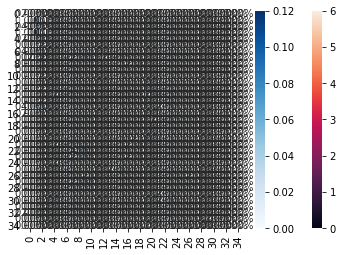

In [3]:
import seaborn as sns
sns.heatmap(cm, annot=True)
sns.heatmap(cm/np.sum(cm), annot=True, 
            fmt='.2%', cmap='Blues')

In [4]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.1


In [5]:
feature_cols=['Unnamed: 0','Months since Last Donation','Number of Donations','Time (months)','Total Volume Donated (c.c.)','	Months since First Donation']


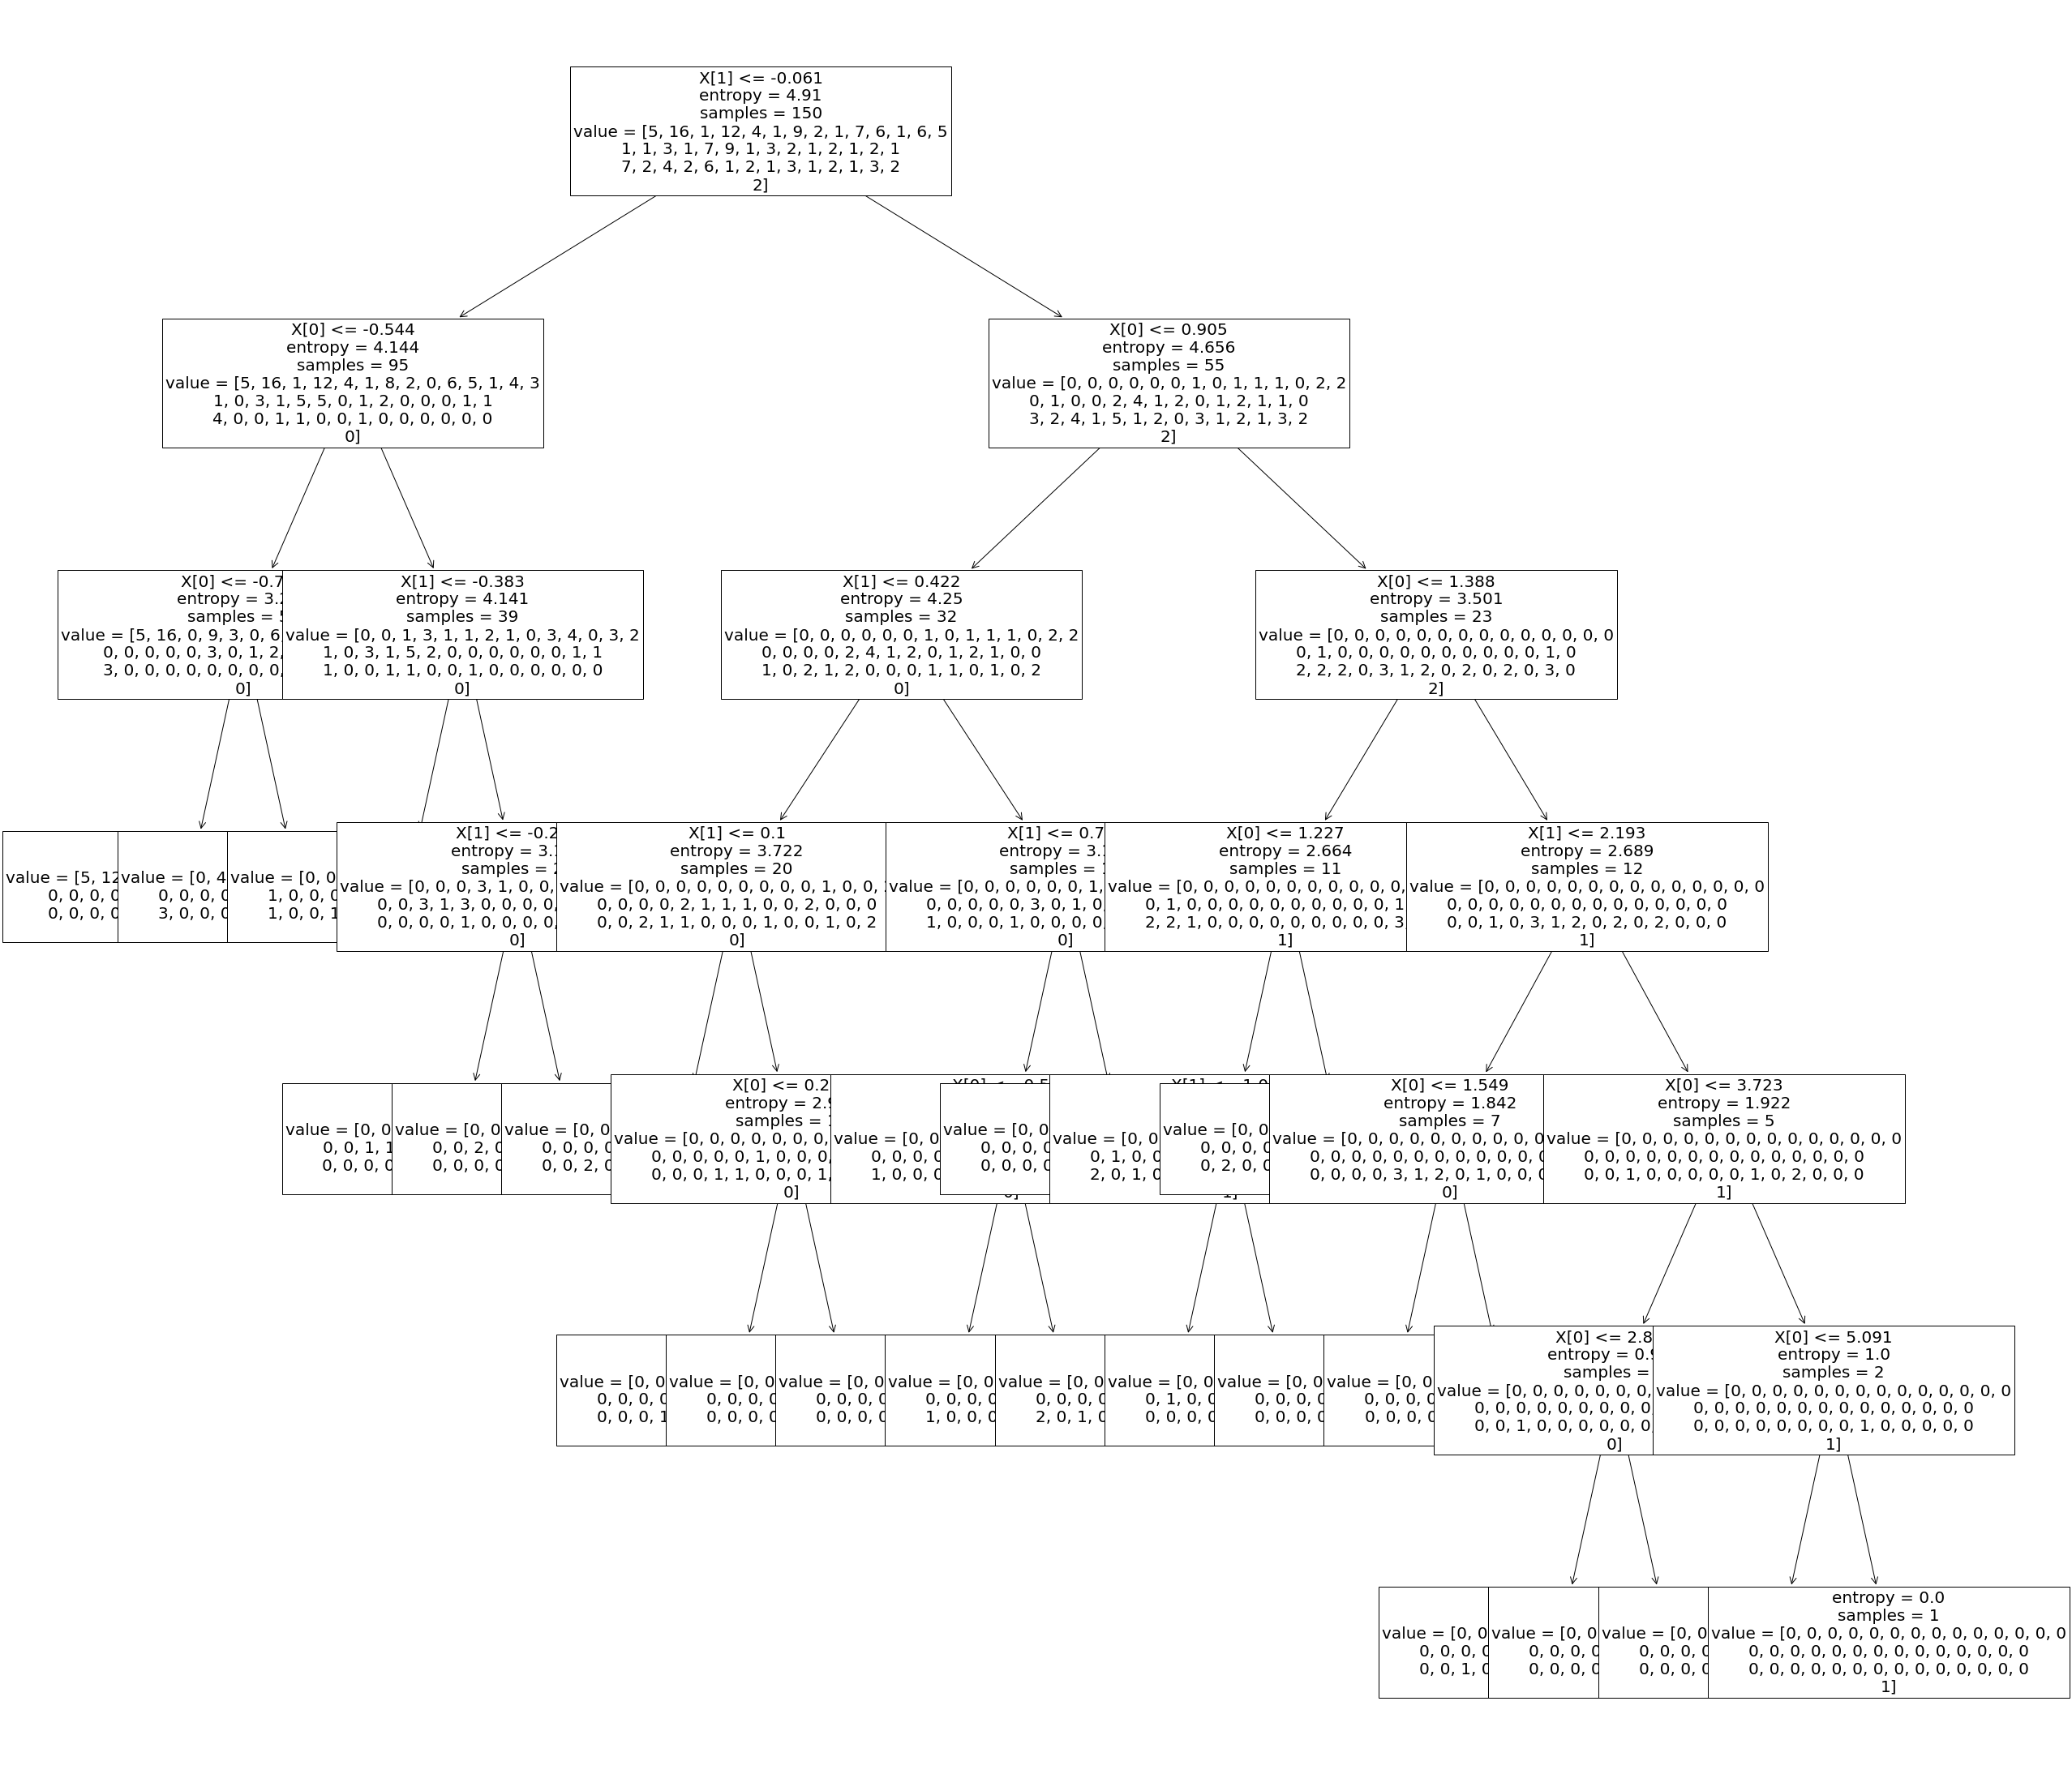

In [6]:
#Visualization of decision tree
from sklearn import tree
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(40,40))
tree.plot_tree(classifier,fontsize=20)
plt.show()